Q.  Implement Page Rank Algorithm. (Use python or beautiful soup for implementation).

In [1]:
import numpy as np

In [2]:
import numpy as np  # Don't forget to import numpy

def calculate_pagerank(adjacency_matrix, damping_factor=0.85, max_iter=100, tol=1.0e-6):
    num_nodes = adjacency_matrix.shape[0]
    initial_pagerank = np.ones(num_nodes) / num_nodes
    pagerank = initial_pagerank.copy()
    
    for iteration in range(max_iter):  # Changed 'max_iterations' to 'max_iter'
        new_pagerank = np.zeros(num_nodes)
        for i in range(num_nodes):
            for j in range(num_nodes):
                if adjacency_matrix[j, i] == 1:
                    outgoing_links = np.sum(adjacency_matrix[j])
                    new_pagerank[i] += pagerank[j] / outgoing_links
        new_pagerank = (1 - damping_factor) / num_nodes + damping_factor * new_pagerank  # Corrected this line
        if np.linalg.norm(new_pagerank - pagerank) < tol:  # Changed 'tolerance' to 'tol'
            break
        pagerank = new_pagerank
    return pagerank


In [3]:
# Example usage:
# Create a sample adjacency matrix representing a directed graph
adjacency_matrix = np.array([
 [0, 1, 0, 0],
 [1, 0, 1, 0],
 [0, 1, 0, 1],
 [0, 0, 1, 0]
])

In [4]:
# Calculate PageRank scores for the graph
pagerank_scores = calculate_pagerank(adjacency_matrix)

In [5]:
# Print the PageRank scores for each node
for i, score in enumerate(pagerank_scores):
 print(f"Node {i + 1}: {score:.4f}")

Node 1: 0.1754
Node 2: 0.3246
Node 3: 0.3246
Node 4: 0.1754


In [1]:
pip install networkx


Note: you may need to restart the kernel to use updated packages.


DEPRECATION: pyodbc 4.0.0-unsupported has a non-standard version number. pip 23.3 will enforce this behaviour change. A possible replacement is to upgrade to a newer version of pyodbc or contact the author to suggest that they release a version with a conforming version number. Discussion can be found at https://github.com/pypa/pip/issues/12063

[notice] A new release of pip is available: 23.2.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [2]:
import networkx as nx

# Create a sample web graph
G = nx.DiGraph()
G.add_edges_from([
    ('A', 'B'),
    ('B', 'A'),
    ('B', 'C'),
    ('C', 'A')
])

# Perform PageRank calculation
pagerank = nx.pagerank(G, alpha=0.85)  # Alpha is the damping factor

# Sort and display the PageRank scores
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)

for page, score in sorted_pagerank:
    print(f'Page: {page}, PageRank: {score:.4f}')


Page: A, PageRank: 0.3974
Page: B, PageRank: 0.3878
Page: C, PageRank: 0.2148


Top Pages by PageRank:
Page: PageA, PageRank: 0.3717
Page: PageB, PageRank: 0.3409
Page: PageC, PageRank: 0.1699
Page: PageD, PageRank: 0.0675
Page: PageE, PageRank: 0.0250
Page: PageF, PageRank: 0.0250


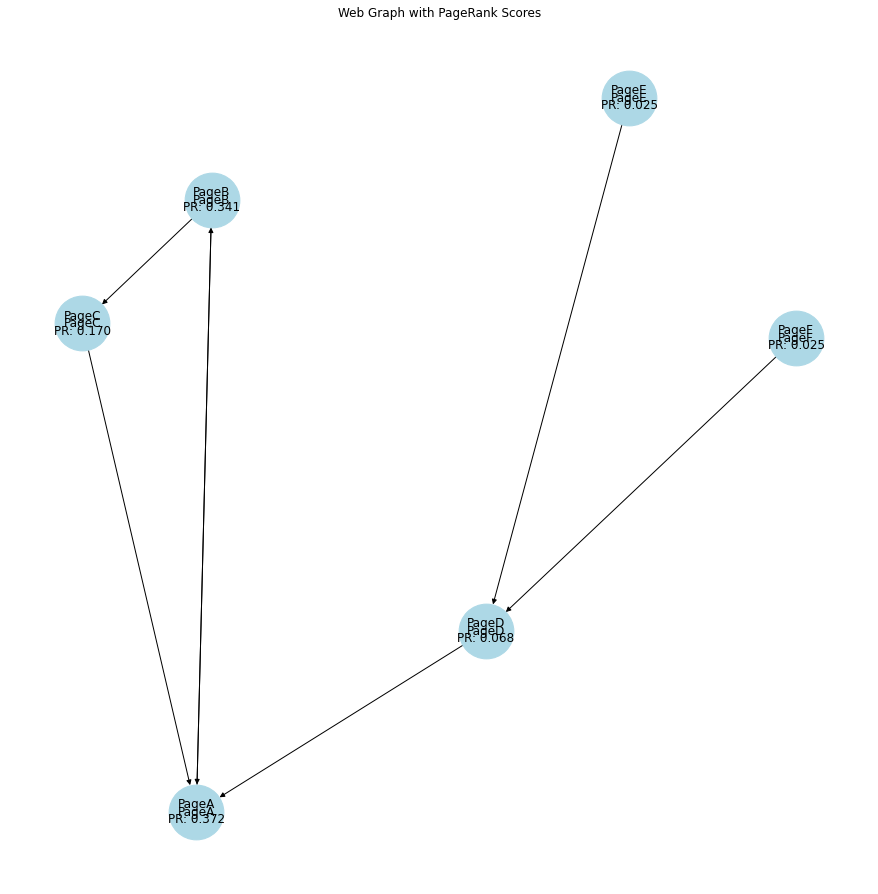

In [11]:
import networkx as nx
import matplotlib.pyplot as plt

# Load a web graph from a file (replace 'web_graph.txt' with your data)
G = nx.read_edgelist('web_graph.txt', create_using=nx.DiGraph())

# Perform PageRank calculation
pagerank = nx.pagerank(G, alpha=0.85)

# Sort and display the top N pages by PageRank
N = 10
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:N]

print("Top Pages by PageRank:")
for page, score in sorted_pagerank:
    print(f'Page: {page}, PageRank: {score:.4f}')

# Visualize the web graph with a larger node size
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))  # Increase the figure size
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12)  # Increase node_size and font_size
labels = {page: page + f'\nPR: {pagerank[page]:.3f}' for page in pagerank}
nx.draw_networkx_labels(G, pos, labels, font_size=12)  # Increase font_size
plt.title("Web Graph with PageRank Scores")
plt.show()


Top Pages by PageRank:
Page: PageA, PageRank: 0.3717
Page: PageB, PageRank: 0.3409
Page: PageC, PageRank: 0.1699
Page: PageD, PageRank: 0.0675
Page: PageE, PageRank: 0.0250
Page: PageF, PageRank: 0.0250


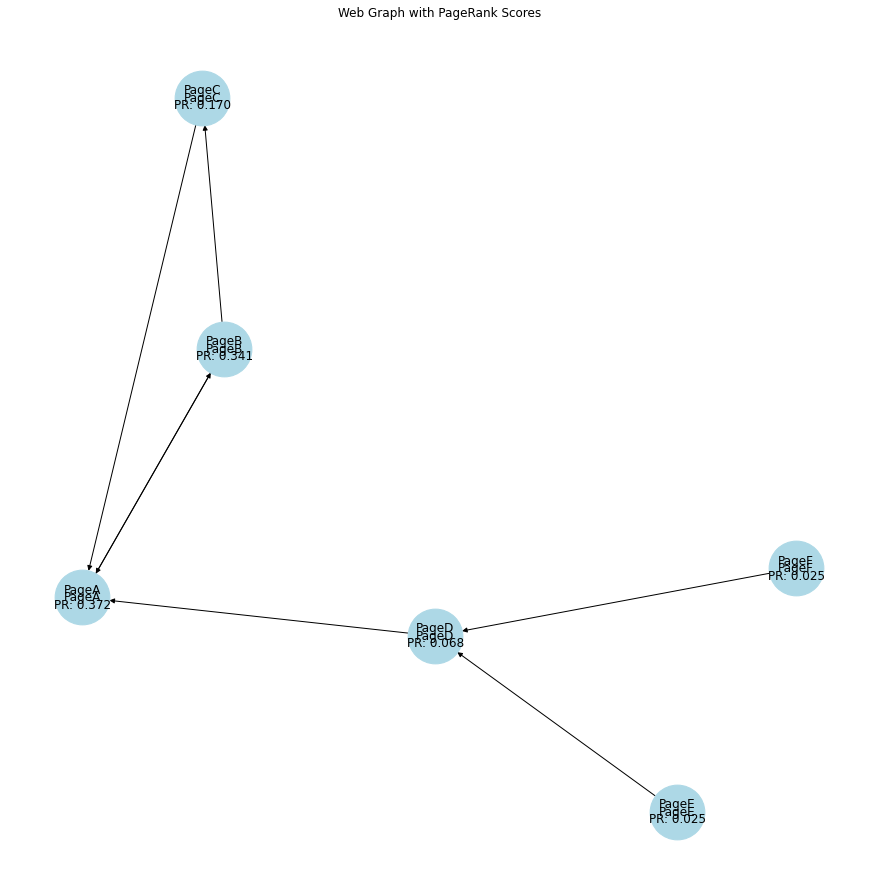

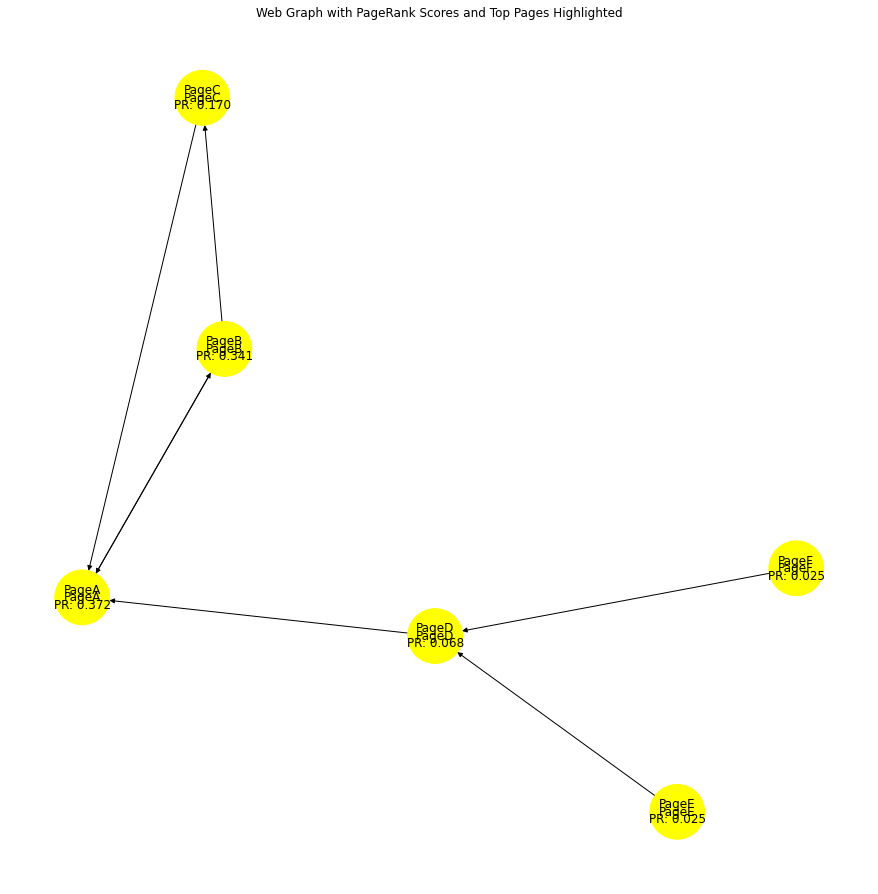

In [12]:
import networkx as nx
import matplotlib.pyplot as plt

# Load a web graph from a file (replace 'web_graph.txt' with your data)
G = nx.read_edgelist('web_graph.txt', create_using=nx.DiGraph())

# Perform PageRank calculation
pagerank = nx.pagerank(G, alpha=0.85)

# Sort and display the top N pages by PageRank
N = 10
sorted_pagerank = sorted(pagerank.items(), key=lambda x: x[1], reverse=True)[:N]

print("Top Pages by PageRank:")
for page, score in sorted_pagerank:
    print(f'Page: {page}, PageRank: {score:.4f}')

# Visualize the web graph with a larger node size
pos = nx.spring_layout(G)
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=12)
labels = {page: page + f'\nPR: {pagerank[page]:.3f}' for page in pagerank}
nx.draw_networkx_labels(G, pos, labels, font_size=12)
plt.title("Web Graph with PageRank Scores")

# Add colors based on PageRank score
node_colors = [pagerank[page] for page in G.nodes()]
cmap = plt.get_cmap("viridis")
vmin = min(node_colors)
vmax = max(node_colors)
node_colors = [(cmap((pagerank[page] - vmin) / (vmax - vmin))) for page in G.nodes()]

# Highlight the top N pages with a different color
top_pages = [page for page, _ in sorted_pagerank]
top_node_colors = ['yellow' if node in top_pages else color for node, color in zip(G.nodes(), node_colors)]

# Draw the graph with the updated node colors
plt.figure(figsize=(12, 12))
nx.draw(G, pos, with_labels=True, node_size=3000, node_color=top_node_colors, font_size=12)
labels = {page: page + f'\nPR: {pagerank[page]:.3f}' for page in pagerank}
nx.draw_networkx_labels(G, pos, labels, font_size=12)
plt.title("Web Graph with PageRank Scores and Top Pages Highlighted")
plt.show()
